In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#importing dataset
dataset = pd.read_csv("pima-indians-diabetes.csv",header=None)
dataset.columns=[str(i) for i  in range(0,(dataset.shape[1]))]

In [3]:
seed = 7
np.random.seed(seed)

In [4]:
X = dataset.drop(["8"], axis=1).as_matrix()
Y = np.array(dataset["8"])

In [5]:
# Importing modules
from sklearn.model_selection import GridSearchCV
from Keras.models import Sequential
from Keras.layers import Dense
from Keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
Using TensorFlow backend.


In [6]:
input_dimension = X.shape[1]

def create_model(optimizer='rmsprop', activation='relu'):
    # creating modelT
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compiling model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [27]:
# creating model
model = KerasClassifier(build_fn=create_model, verbose=0)
# defining the grid search parameters
batch_size = [10, 20, 50,100]
epochs = [10,50, 100]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.682292 using {'nb_epoch': 100, 'batch_size': 10}
0.657552 (0.031466) with: {'nb_epoch': 10, 'batch_size': 10}
0.665365 (0.038976) with: {'nb_epoch': 50, 'batch_size': 10}
0.682292 (0.017566) with: {'nb_epoch': 100, 'batch_size': 10}
0.604167 (0.052634) with: {'nb_epoch': 10, 'batch_size': 20}
0.677083 (0.026748) with: {'nb_epoch': 50, 'batch_size': 20}
0.669271 (0.013279) with: {'nb_epoch': 100, 'batch_size': 20}
0.537760 (0.150997) with: {'nb_epoch': 10, 'batch_size': 50}
0.625000 (0.044309) with: {'nb_epoch': 50, 'batch_size': 50}
0.648438 (0.032369) with: {'nb_epoch': 100, 'batch_size': 50}
0.575521 (0.038976) with: {'nb_epoch': 10, 'batch_size': 100}
0.638021 (0.016367) with: {'nb_epoch': 50, 'batch_size': 100}
0.532552 (0.148996) with: {'nb_epoch': 100, 'batch_size': 100}


In [28]:
model = KerasClassifier(build_fn=create_model, nb_epoch=100, batch_size=10, verbose=0)
# defining the grid search parameters
optimizer = ['sgd', 'rmsprop', 'adagrad', 'adadelta', 'adam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.694010 using {'optimizer': 'adam'}
0.455729 (0.146518) with: {'optimizer': 'sgd'}
0.576823 (0.137195) with: {'optimizer': 'rmsprop'}
0.678385 (0.012890) with: {'optimizer': 'adagrad'}
0.671875 (0.008438) with: {'optimizer': 'adadelta'}
0.694010 (0.028587) with: {'optimizer': 'adam'}


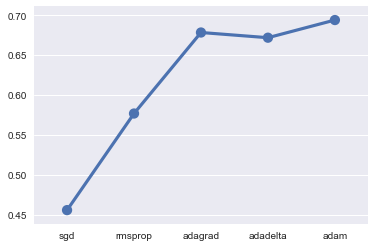

In [30]:
sns.pointplot(optimizer, means)

In [31]:
model = KerasClassifier(build_fn=create_model, nb_epoch=100, batch_size=10, verbose=0)
# defining the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.705729 using {'activation': 'softplus'}
0.661458 (0.034987) with: {'activation': 'softmax'}
0.705729 (0.023939) with: {'activation': 'softplus'}
0.653646 (0.028587) with: {'activation': 'softsign'}
0.548177 (0.158362) with: {'activation': 'relu'}
0.682292 (0.021236) with: {'activation': 'tanh'}
0.658854 (0.032734) with: {'activation': 'sigmoid'}
0.664063 (0.041707) with: {'activation': 'hard_sigmoid'}
0.555990 (0.123086) with: {'activation': 'linear'}


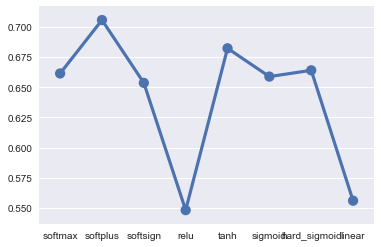

In [32]:
sns.pointplot(activation, means)

In [ ]:
#no